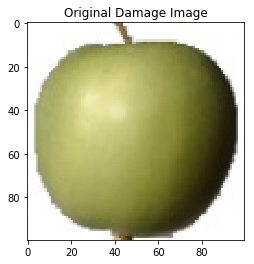

Out 2 (100, 100, 3)


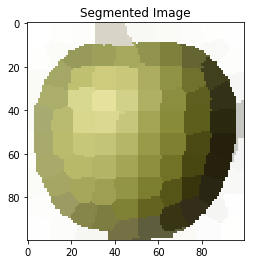

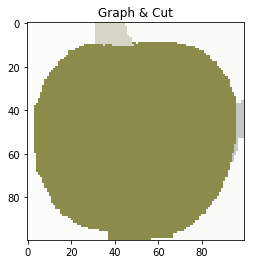

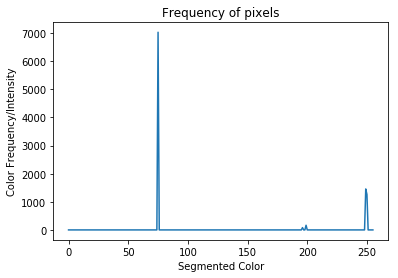

In [5]:
import cv2
import matplotlib.pyplot as plt
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt

from skimage import io
from skimage import exposure
import os
import numpy as np
from sklearn.decomposition import PCA 

img = image = cv2.imread('11.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Damage Image")
plt.show()
labels1 = segmentation.slic(img, compactness=30, n_segments=100)
out1 = color.label2rgb(labels1, img, kind='avg')


g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

print("Out 2", out2.shape)

plt.imshow(cv2.cvtColor(out1, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.show()

plt.imshow(cv2.cvtColor(out2, cv2.COLOR_BGR2RGB))
plt.title("Graph & Cut")
plt.show()

# find frequency of pixels in range 0-255 
histr = cv2.calcHist([out2],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histr)
plt.title("Frequency of pixels")
plt.xlabel("Segmented Color")
plt.ylabel("Color Frequency/Intensity")
plt.show() 


# 